In [1]:
library(ComplexHeatmap)

Loading required package: grid
ComplexHeatmap version 1.17.1
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://bioconductor.org/packages/ComplexHeatmap/

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.



In [3]:
dataTable <- read.delim("original_moods_df.csv", header = TRUE, sep=",")
head(dataTable)

aggressive,angsty,atmospheric,campy,celebratory,classy,cocky,cold,earthy,energetic,⋯,seductive,sexual,soothing,spacey,sprightly,sweet,trashy,trippy,visceral,warm
0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0


In [4]:
dataMat <- dataTable[, -1]
head(dataMat)
dim(dataMat) #Shape of data matrix

angsty,atmospheric,campy,celebratory,classy,cocky,cold,earthy,energetic,funky,⋯,seductive,sexual,soothing,spacey,sprightly,sweet,trashy,trippy,visceral,warm
0,0,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0


[1] 36733    31

In [9]:
cor.mat <- cor(dataMat, method = "pearson", use = "pairwise.complete.obs")
head(cor.mat)
dim(cor.mat)

,angsty,atmospheric,campy,celebratory,classy,cocky,cold,earthy,energetic,funky,⋯,seductive,sexual,soothing,spacey,sprightly,sweet,trashy,trippy,visceral,warm
angsty,1.000000000,-0.05594827,-0.03636353,-0.05133232,-0.04829710,-0.007726386,0.006233599,-0.04806476,0.09633938,-0.069174744,⋯,-0.05445891,-0.02691032,-0.05862016,-0.03583878,-0.07018483,-0.03947093,0.29962532,-0.04242580,0.03595620,-0.06026568
atmospheric,-0.055948274,1.00000000,-0.04665115,-0.06585476,-0.06196085,-0.061292978,0.089010316,-0.03625232,-0.08879109,-0.069042867,⋯,0.01933851,-0.03452352,0.13741730,0.24522088,-0.07705748,-0.05063767,-0.03665579,0.03823194,-0.06503334,-0.05973657
campy,-0.036363535,-0.04665115,1.00000000,0.09895922,0.06171997,-0.022054792,0.011472912,-0.04007767,-0.03995937,-0.057679736,⋯,-0.04540929,-0.02243854,-0.04887904,-0.03514744,-0.02865015,0.03946850,-0.02382440,-0.03537576,-0.04226837,-0.02425071
celebratory,-0.051332317,-0.06585476,0.09895922,1.00000000,-0.05684884,0.100965376,-0.054646970,-0.05657536,0.14918471,0.003955438,⋯,-0.06410168,-0.02796911,-0.06899974,-0.04961563,-0.08261212,-0.03423223,-0.03363154,-0.04993793,-0.05966783,-0.06035617
classy,-0.048297105,-0.06196085,0.06171997,-0.05684884,1.00000000,-0.052910898,-0.051415767,-0.05323013,-0.07727409,-0.050020467,⋯,0.01180518,-0.02980228,-0.02441069,-0.04668192,0.04505806,-0.04371275,-0.03164295,-0.04698517,-0.05613975,-0.01367598
cocky,-0.007726386,-0.06129298,-0.02205479,0.10096538,-0.05291090,1.000000000,-0.036675142,-0.05265636,-0.03644597,-0.004885565,⋯,-0.05914850,0.06634448,-0.06422010,-0.04617874,-0.07688955,-0.04324157,0.13279377,-0.04647871,0.12910183,-0.06602282


[1] 31 31

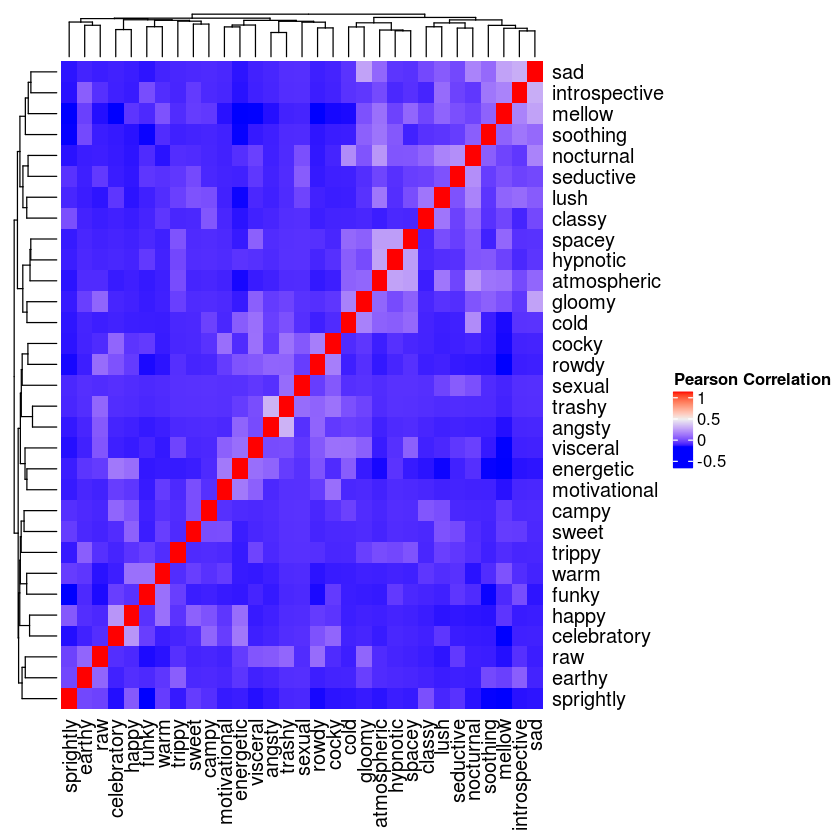

In [7]:
#classes = data.frame(Type = c(rep("Normal",5), rep("Cancer",24)))
#ha = HeatmapAnnotation(df = classes)
map <- Heatmap(cor.mat, name="Pearson Correlation")
map

In [18]:
cor.mat['trippy', 'warm']

[1] -0.0334877

dist.mat <- 1 - cor.mat
mds <- cmdscale(dist.mat)
colors <- c("palevioletred4", "darkcyan")
plot(mds[,1], mds[,2], pch=19, col=colors, xlab="First Dimension", ylab="Second Dimension", 
    main = "Multi-Dimensional Scaling Plot")
legend("bottomright", legend = levels(classes$Type), col = colors, pch = 16)